In [1]:
import numpy as np

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

Text(0.5, 0, '$x_1$')

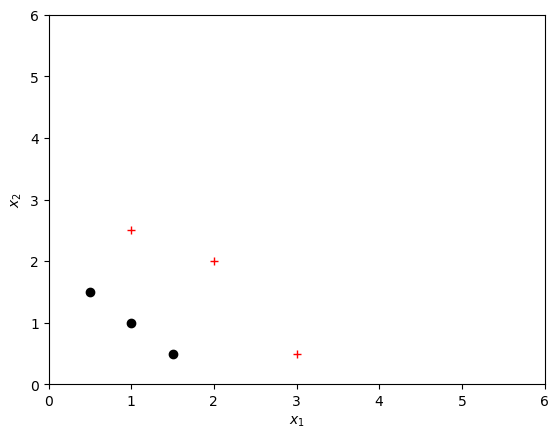

In [3]:
import matplotlib.pyplot as plt
from lab_utils import plot_data

plot_data(X,y)

# Set both axes to be from 0-6
plt.axis([0, 6, 0, 6])
# Set the y-axis label
plt.ylabel('$x_2$')
# Set the x-axis label
plt.xlabel('$x_1$')

In [4]:
# Add a column to X_orig to account for the w_0 term
X_mod = np.hstack([np.ones((X.shape[0],1)), X])

print(X_mod)

[[1.  0.5 1.5]
 [1.  1.  1. ]
 [1.  1.5 0.5]
 [1.  3.  0.5]
 [1.  2.  2. ]
 [1.  1.  2.5]]


In [5]:
from lab_utils import sigmoid 

print(sigmoid(0))

0.5


In [6]:
def compute_cost(X, y, w):
    # Here X is assumed to pre-processed with a column of ones added as x_0

    m, n = X.shape
    cost_list = []
    
    for i in range(m):
        ### START CODE HERE ### 
        z = np.dot(w.T, X[i])
        f = sigmoid(z)
        cost = -y[i]*np.log(f) - (1-y[i])*np.log(1-f)
        ### END CODE HERE ### 
        
        cost_list.append(cost)
        
    total_cost = (1/m)* sum(cost_list)
    return total_cost

In [8]:
w = np.array([-3,1,1])
print(compute_cost(X_mod, y, w))

0.3668667864055174


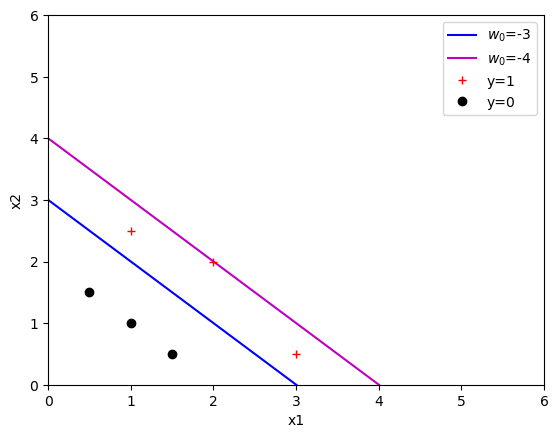

In [9]:
# Choose values between 0 and 6
x1 = np.arange(0,6)

# Plot the two decision boundaries
x2 = 3 - x1
x2_other = 4 - x1

# Plot the decision boundary
plt.plot(x1,x2, c="b", label="$w_0$=-3")
plt.plot(x1,x2_other, c="m", label="$w_0$=-4")
plt.axis([0, 6, 0, 6])

# Plot the original data
plot_data(X,y)
# Set the y-axis label
plt.ylabel('x2')
# Set the x-axis label
plt.xlabel('x1')

plt.legend(loc="upper right")

In [10]:
w_array1 = np.array([-3,1,1])
w_array2 = np.array([-4,1,1])

print("Cost for w0 = -3 : ", compute_cost(X_mod, y, w_array1))
print("Cost for w0 = -4 : ",compute_cost(X_mod, y, w_array2))

Cost for w0 = -3 :  0.3668667864055174
Cost for w0 = -4 :  0.503680863674846


# Vectorized version

In [11]:
def compute_cost_vectorized(X, y, w):
    # Here X is assumed to pre-processed with a column of ones added as x_0
    m = X.shape[0]
    
    ### START CODE HERE ### 
    z = np.dot(X, w)
    f = sigmoid(z)
    total_cost = (1/m)*(np.dot(-y.T, np.log(f)) - np.dot((1-y).T, np.log(1-f)))
    ### END CODE HERE ### 
    
    return total_cost

In [12]:
print("Cost computed by non-vectorized version: ", compute_cost(X_mod, y, w))
print("Cost computed by vectorized version: ", compute_cost_vectorized(X_mod, y, w))

Cost computed by non-vectorized version:  0.3668667864055174
Cost computed by vectorized version:  0.36686678640551734
